# Exploration of world-development-indicator dataset using Matplotlib:

### Initial exploration of the Dataset

Data Source: https://www.kaggle.com/worldbank/world-development-indicators <br> Folder: 'world-development-indicators'

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape
#data.head()

(5656458, 6)

In [3]:
#Total number of countries
print(len(data['CountryCode'].unique()))

#Total number of indicators
print(len(data['IndicatorCode'].unique()))

247
1344


In [4]:
#Getting Total number of 'Year'
print(len(data['Year'].unique()))

#Getting minimum 'Year' value
print(min(data['Year']))

#Getting maximum 'Year' value
print(max(data['Year']))

56
1960
2015


## Basic Plotting:

In [5]:
#Creating mask for country 'IND'. Returns a boolean series.
mask_country=data['CountryCode']=='IND'

#Creating mask for Indicator 'CO2 emissions (metric tons per capita)'. Returns a boolean series.
mask_indicator=data['IndicatorName'].str.contains('CO2 emissions \(metric')

stage = data[(mask_country) & (mask_indicator)]
stage.tail()
#len(stage)  #Will give number of records 'stage' has

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4386994,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2007,1.365787
4567309,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2008,1.497886
4746431,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2009,1.619049
4929232,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2010,1.584870
5111048,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,1.662873


### Bar Plot

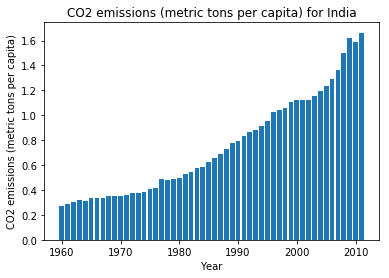

In [7]:
years=stage['Year'].values  #.values will convert the pandas series to numpy array
value=stage['Value'].values  #.values will convert the pandas series to numpy array

#Label the axes
plt.xlabel('Year')
plt.ylabel(stage.iloc[0]['IndicatorName']) #plt.ylabel(stage['IndicatorName'].iloc[0]) will also result the same.

#Giving title "'IndicatorName' for 'CountryName'"
plt.title(stage.iloc[0]['IndicatorName']+' for '+stage.iloc[0]['CountryName'])

#Plotting/Creating the bar chart.
plt.bar(years,value)
plt.show()

### Line Plot

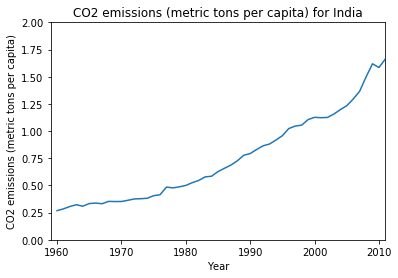

In [8]:
years=stage['Year'].values
value=stage['Value'].values

#Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#Giving title "IndicatorName for CountryName"
plt.title(stage.iloc[0]['IndicatorName']+' for '+stage.iloc[0]['CountryName'])

#Specifying the minimum and maximum axes values
plt.axis([1959, 2011, 0, 2])

#Creating a Line Plot
plt.plot(years, value)
plt.show()

### Histogram
To explore the distribution of values

In [9]:
#Sometimes it's helpful with histograms to avoid the data getting too spread out because of outliers.
#So if you want to just include those within one standard deviation fo the mean, you could do the following:
#lower = stage['Value'].mean() - stage['Value'].std()
#upper = stage['Value'].mean() + stage['Value'].std()
#hist_data = [x for x in stage[:10000]['Value'] if x>lower and x<upper ]

# Otherwise, let's look at all the data
hist_data = stage['Value'].values
stage.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4386994,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2007,1.365787
4567309,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2008,1.497886
4746431,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2009,1.619049
4929232,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2010,1.584870
5111048,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,1.662873


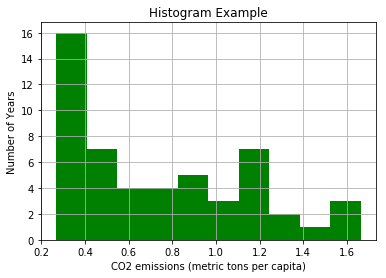

In [10]:
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('Number of Years')
plt.title('Histogram Example')

#To provide grids
plt.grid(True)

#Plotting histogram
plt.hist(hist_data, bins=10, normed=False, facecolor='green')  #normed=False makes sure not to scale the data
plt.show()

#The diagram tells, India has many years where it produced 0.25-4 metric tons CO2 per capita with outliers.

## Histogram of the emmissions per capita by country

In [11]:
#Creating mask for Indicator 'CO2 emissions (metric tons per capita)'
mask_indicator2 = data['IndicatorName'].str.contains('CO2 emissions \(metric')
#Creating mask for a specific year
mask_year = data['Year']==2011

# apply our mask
co2_2011 = data[(mask_indicator2) & (mask_year)]
co2_2011.head()

#len(co2_2011)  #To get number of records co2_2011 has

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


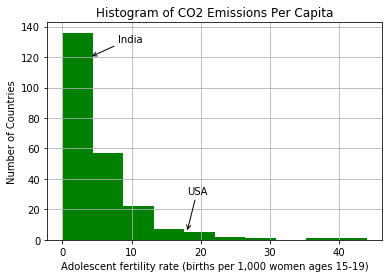

In [12]:
hist_data = co2_2011['Value'].values

#subplots returns a tuple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("USA", #Text which will be printed in the plot
            xytext=(18, 30), textcoords='data', #Co-ordinate where the text will be located
            xy=(18, 5), xycoords='data', #Co-ordinate to where the arrow mark will point
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            )

ax.annotate("India", #Text which will be printed in the plot
            xytext=(8, 130), textcoords='data', #Co-ordinate where the text will be located
            xy=(4, 120), xycoords='data', #Co-ordinate to where the arrow mark will point
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            )

plt.xlabel(data['IndicatorName'].iloc[0])
plt.ylabel('Number of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')
plt.grid(True)
#plt.axis([-1, 50, 0, 140])

plt.hist(hist_data, bins=10, normed=False, facecolor='green')
plt.show()

## GDP of countries who has highest CO2 emission levels:

In [13]:
mask1=data['Year']==2011
mask2=data['IndicatorName'].str.contains('GDP per capita \(current US')
mask3=data['IndicatorName'].str.contains('CO2 emissions \(metric')
mask4=data['Value']>25

In [14]:
data[mask1 & (mask2 | mask3)].head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026389,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,2011,6911.566859
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5026884,Caribbean small states,CSS,GDP per capita (current US$),NY.GDP.PCAP.CD,2011,9373.261220
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131


In [15]:
val1=data[mask1 & (mask2 | mask3) & (mask3 & mask4)]['CountryCode'].values
for i in val1:
    val2=data[(data['CountryCode']==i) & mask1 & mask2]
    print(val2)

        CountryName CountryCode                 IndicatorName   IndicatorCode  \
5123016      Kuwait         KWT  GDP per capita (current US$)  NY.GDP.PCAP.CD   

         Year         Value  
5123016  2011  47551.382967  
        CountryName CountryCode                 IndicatorName   IndicatorCode  \
5161615       Qatar         QAT  GDP per capita (current US$)  NY.GDP.PCAP.CD   

         Year         Value  
5161615  2011  89115.901491  
                 CountryName CountryCode                 IndicatorName  \
5188248  Trinidad and Tobago         TTO  GDP per capita (current US$)   

          IndicatorCode  Year         Value  
5188248  NY.GDP.PCAP.CD  2011  18287.402474  


## Relationship between GDP and CO2 Emissions in India

In [17]:
#Creating masks for country 'India' and indicator 'CO2 emissions (metric tons per capita)'
mask_country1=data['CountryCode']=='IND'
mask_indicator1=data['IndicatorName'].str.contains('CO2 emissions \(metric')

#Creating masks for country 'India' and indicator 'GDP per capita (constant 2005 US$)'
mask_country2 = data['CountryCode'].str.contains('IND')
mask_indicator2 = data['IndicatorName'].str.contains('GDP per capita \(constant 2005') 

#Create a staging dataframe for records of CO2 emissions for India
co2_stage = data[(mask_country1) & (mask_indicator1)]
#Create a staging dataframe for records of GDP per capita for India
gdp_stage = data[mask_indicator2 & mask_country2]

In [18]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11616,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,228.304470
36555,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,232.142053


In [19]:
co2_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11577,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.268161
36513,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.284292


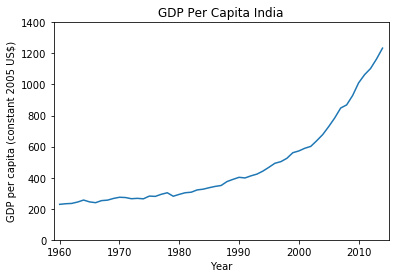

In [20]:
#Create a line plot for trend of GDP per capita for India

plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])
plt.title('GDP Per Capita India')

plt.axis([1959, 2015,0,1400])

plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)
plt.show()

### ScatterPlot:
Scatter plot for comparing GDP against CO2 emissions (per capita)

In [21]:
#Scatterplot requires equal length arrays to compare.
#To make sure we're looking at the same time frames for GDP per capita and CO2 emissions:

print("GDP Min Year =", gdp_stage['Year'].min(), " max:", gdp_stage['Year'].max())
print("CO2 Min Year =", co2_stage['Year'].min(), " max:", co2_stage['Year'].max())

GDP Min Year = 1960  max: 2014
CO2 Min Year = 1960  max: 2011


In [22]:
#To make sure scatterplot has equal length arrays to compare, we are removing 3 extra years from GDP data:

gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(co2_stage))

52
52


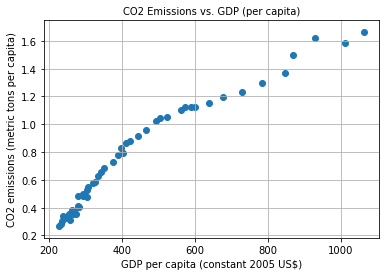

In [23]:
#fig, axis = plt.subplots()
#axis.yaxis.grid(True)
#axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
#axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
#axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)
plt.grid(True)
plt.title('CO2 Emissions vs. GDP (per capita)',fontsize=10)
plt.xlabel(gdp_stage_trunc.iloc[0]['IndicatorName'],fontsize=10)
plt.ylabel(co2_stage.iloc[0]['IndicatorName'],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

#axis.scatter(X, Y)
plt.scatter(X,Y)
plt.show()

In [24]:
#To check the value of correlation coefficient between CO2 emissions and GDP per capita
np.corrcoef(gdp_stage_trunc['Value'],co2_stage['Value'])

array([[ 1.        ,  0.96753758],
       [ 0.96753758,  1.        ]])

From the scatter plot, we can see that the CO2 emission of India has increased with the increase of GDP per capita. The same can be verified with the correlation coefficient as well.

### Matplotlib Examples Library:
http://matplotlib.org/examples/index.html